# Qualitative Analysis

## Data visualization with PCA Analysis

In [1]:
pca_df = []

### Get the real-world dataset

In [2]:
import pandas as pd

In [3]:
REAL_WORLD_DATASET = 'sobar-72.csv'

In [4]:
pca_df.append(pd.read_csv(REAL_WORLD_DATASET))

In [3]:
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()

df_base = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                  columns=iris['feature_names'] + ['target'])

df_base = df_base.rename({"sepal length (cm)": '0', 
                          "sepal width (cm)": '1',
                          "petal length (cm)": '2',
                          "petal width (cm)": '3',
                          "target": 'label'}, axis=1)

pca_df.append(df_base)

### Get the synthetic datasets

In [6]:
NUMBER_OF_DATASETS = 5

In [7]:
for i in range(0, NUMBER_OF_DATASETS):
    filename = str(i) + "-NGEN=20000-C2-L2-N1-F2"
    pca_df.append(pd.read_csv(filename + ".csv"))
    pca_df[i+1] = pca_df[i+1].drop("Unnamed: 0", axis=1)


### PCA

Using 2 principal components

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)


Decomposition with PCA `fit_transform`

In [9]:
for i, df in zip(range(len(pca_df)), pca_df):

    label_df = df['label']

    df.drop('label', axis=1)

    # You must normalize the data before applying the fit method
    df_normalized = (df - df.mean()) / df.std()
    pca = PCA(n_components=2)
    pca.fit(df_normalized)

    principalComponents = pca.fit_transform(df_normalized)

    df = pd.DataFrame(data=principalComponents, columns=['pc1', 'pc2'])
    pca_df[i] = pd.concat([df, label_df], axis=1)


Visualizing the transformations

In [10]:
import matplotlib.pyplot as plt

In [11]:
import matplotlib.cm as cm

cmap = cm.get_cmap('Paired', 3)

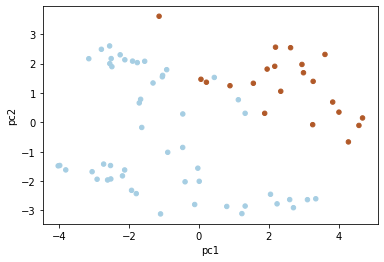

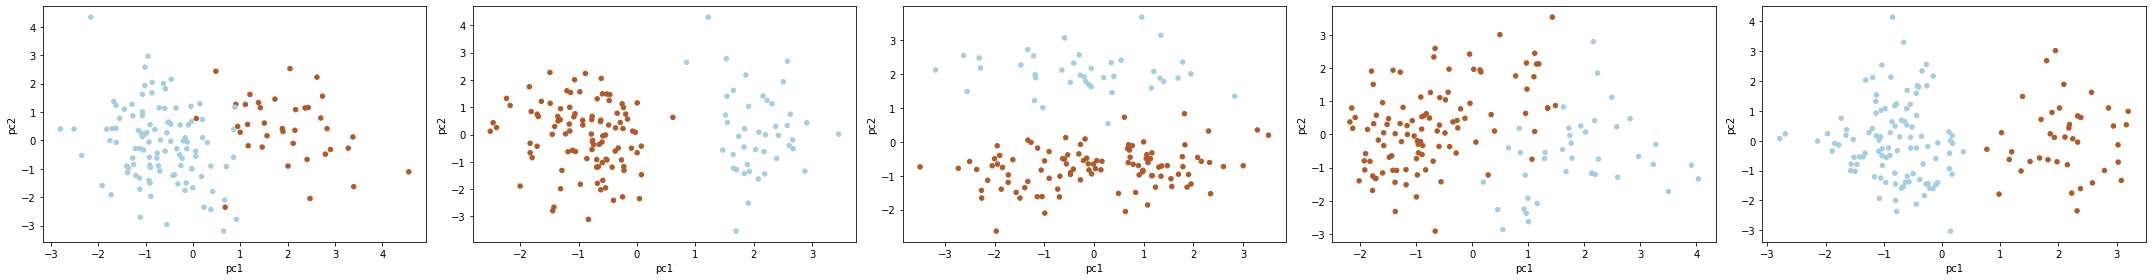

In [12]:
pca_df[0].plot(kind='scatter', x='pc1',
               y='pc2', c='label', colormap=cmap, colorbar=False)
plt.show()

fig, axes = plt.subplots(ncols=5, figsize=(30,4))

[pca_df[i+1].plot(ax=axes[i], kind='scatter', x='pc1',
                  y='pc2', c='label', colormap=cmap, colorbar=False) 
                  for i in range(len(pca_df)-1)]
plt.tight_layout()
plt.show()


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

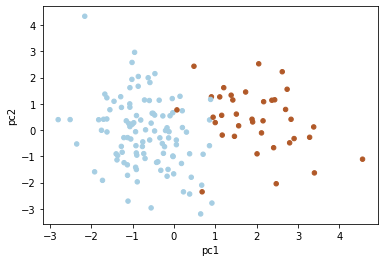

In [14]:
pca_df[1].plot(kind='scatter', x='pc1',
               y='pc2', c='label', colormap=cmap, colorbar=False)
